Building an image classifier with Keras

In [47]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()
X_train_full.shape

(60000, 28, 28)

Build validation, testing and training sets

In [5]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

Whats our data? Image classification data.

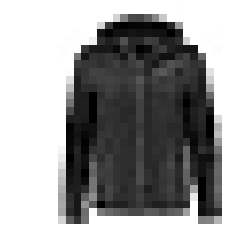

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap="binary")
plt.axis('off')
plt.show()

So now we make a list of names used for each of the classes

In [8]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress",
              "Coat","Sandal","Shirt","Sneaker","Bag",
               "Ankle boot"]
class_names[y_train[0]]

'Coat'

Heres what all the images we'll be working with look like.

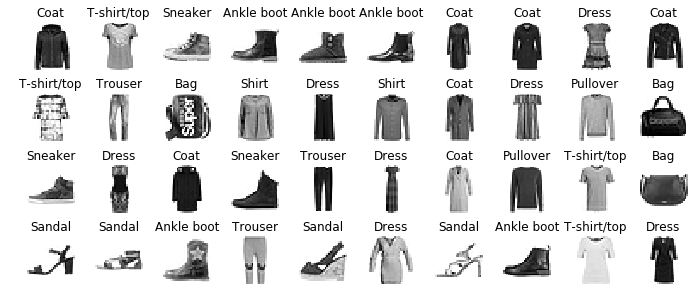

In [10]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]],fontsize=12)
        
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Now lets actually build the keras model.

In [11]:
import numpy as np

#we add layers using the .add() method to the model object
model = keras.models.Sequential()
#we specify the input shape for the input layer
model.add(keras.layers.Flatten(input_shape=[28,28]))
#specify the number of neurons and activation 
#function for each layer
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
#the output layer should have the number of classes
#and a softmax activation function for multi-classification
model.add(keras.layers.Dense(10, activation="softmax"))

#This next line of code clears the graph
keras.backend.clear_session()

Now theres another way of doing this, which can be a little more clean.

In [13]:
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.layers

In [15]:
model_2.layers

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
keras.utils.plot_model(model,"mnist_model.png",show_shapes=True)
plt.show()

![](mnist_model.png)

Now that we've built the model, lets train it and validate it.

In [29]:
# Compile the model, as we specify the loss function
# the opitmizer and scoring metrix
model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

# Train/fit the model, record its output at every step
hist = model_2.fit(X_train,y_train, 
                   epochs=30,
                   validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 105us/step - loss: 0.7264 - acc: 0.7594 - val_loss: 0.5049 - val_acc: 0.8304
Epoch 2/30
55000/55000 [==============================] - 5s 89us/step - loss: 0.4911 - acc: 0.8300 - val_loss: 0.4383 - val_acc: 0.8518
Epoch 3/30
55000/55000 [==============================] - 5s 96us/step - loss: 0.4455 - acc: 0.8448 - val_loss: 0.4298 - val_acc: 0.8536
Epoch 4/30
55000/55000 [==============================] - 5s 99us/step - loss: 0.4160 - acc: 0.8535 - val_loss: 0.3956 - val_acc: 0.8626
Epoch 5/30
55000/55000 [==============================] - 6s 100us/step - loss: 0.3950 - acc: 0.8616 - val_loss: 0.3841 - val_acc: 0.8674
Epoch 6/30
55000/55000 [==============================] - 6s 108us/step - loss: 0.3788 - acc: 0.8658 - val_loss: 0.3962 - val_acc: 0.8594
Epoch 7/30
55000/55000 [==============================] - 6s 102us/step - loss: 0.3651 - acc: 0.8709 - val_loss: 0.3567 - val_

Now lets make a graph of the loss function as a function of each epoch of training.

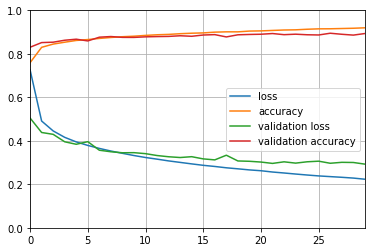

In [45]:
#plt.plot(history.epoch,history[])
plt.plot(hist.epoch,hist.history["loss"],label="loss")
plt.plot(hist.epoch,hist.history["acc"],label="accuracy")
plt.plot(hist.epoch,hist.history["val_loss"],label="validation loss")
plt.plot(hist.epoch,hist.history["val_acc"],label="validation accuracy")
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.gca().set_xlim(0,29)
plt.legend()
plt.show()

This same graph can be done in much cleaner amounts of code

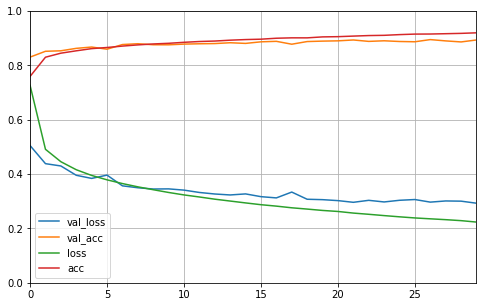

In [51]:
import pandas as pd
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Now we should evaluate the model on the test set. How does it perform?

In [49]:
model_2.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 40us/step


[2.3845610067367526, 0.8499]

We should also predict values based upon new data points.

In [58]:
X_new = X_test[:10]

y_prob = model_2.predict_classes(X_new)
y_prob

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

So what are the names of these predictions? Put them with label names.

In [60]:
np.array(class_names)[y_prob]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

And we are done.